<a href="https://colab.research.google.com/github/pranjul6386/covid19/blob/master/ct_scans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip "/content/drive/My Drive/kaggle_notebooks/covid_ctscan.zip"

Archive:  /content/drive/My Drive/kaggle_notebooks/covid_ctscan.zip
  inflating: New_Data_CoV2/Covid/Patient (10)/AnotaтАб╓╢o 2020-04-28 132320.png  
  inflating: New_Data_CoV2/Covid/Patient (10)/AnotaтАб╓╢o 2020-04-28 132449.png  
  inflating: New_Data_CoV2/Covid/Patient (10)/AnotaтАб╓╢o 2020-04-28 132516.png  
  inflating: New_Data_CoV2/Covid/Patient (10)/AnotaтАб╓╢o 2020-04-28 132540.png  
  inflating: New_Data_CoV2/Covid/Patient (10)/AnotaтАб╓╢o 2020-04-28 132608.png  
  inflating: New_Data_CoV2/Covid/Patient (10)/AnotaтАб╓╢o 2020-04-28 132636.png  
  inflating: New_Data_CoV2/Covid/Patient (10)/AnotaтАб╓╢o 2020-04-28 132704.png  
  inflating: New_Data_CoV2/Covid/Patient (10)/AnotaтАб╓╢o 2020-04-28 132740.png  
  inflating: New_Data_CoV2/Covid/Patient (10)/AnotaтАб╓╢o 2020-04-28 132814.png  
  inflating: New_Data_CoV2/Covid/Patient (10)/AnotaтАб╓╢o 2020-04-28 132844.png  
  inflating: New_Data_CoV2/Covid/Patient (10)/AnotaтАб╓╢o 2020-04-28 132926.png  
  inflating: New_Data_CoV2/Cov

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import PIL
import os

In [13]:
sample_size=4171
root_dir="/content/New_Data_CoV2"
image_width = 128
image_height = 128
image_channels = 3 
MODEL_PATH = "/content/model.pb"


In [14]:
image_path=root_dir + "/" + dir + "/" +item + "/" + img
image=cv2.imread(image_path)
plt.imshow(image)

TypeError: ignored

In [15]:
count=0
for item in os.listdir("/content/New_Data_CoV2/Healthy"):
  for img in os.listdir("/content/New_Data_CoV2/Healthy" + "/" +item ):
    image=cv2.imread(img)
    count=count+1
print(count)

758


In [16]:
curidx=0
labels=[]
ct_images_np = np.zeros((sample_size,image_width,image_height,image_channels))
for dir in os.listdir(root_dir):
  for item in os.listdir(root_dir + "/" + dir ):
    for img in os.listdir(root_dir + "/" + dir + "/" +item):
      image_path=root_dir + "/" + dir + "/" +item + "/" + img
      image=cv2.imread(image_path)
      if image is None:
        print("file not found")
        continue
      image=cv2.resize(image,(image_width,image_height))
      image= cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)
      ct_images_np[curidx,:,:,:]=np.asarray(image)
      curidx=curidx+1
      labels.append(dir)


      


file not found
file not found


In [17]:
curidx

4171

In [18]:
len(labels)

4171

In [ ]:
labels[3809:4005]

In [20]:
ct_images_np.shape

(4171, 128, 128, 3)

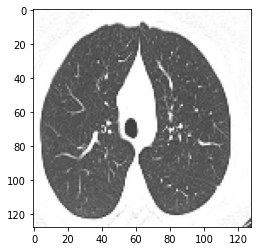

In [21]:
plt.imshow(ct_images_np[4]/255.0)

In [22]:
y=np.array(labels)

In [23]:
y.shape

(4171,)

In [24]:
y=np.array(labels)

In [25]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
transfomed_label = encoder.fit_transform(y)
print(transfomed_label)

[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(ct_images_np,transfomed_label,test_size=0.25,random_state=0)

In [27]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras

In [28]:
x_train

array([[[[214., 214., 214.],
         [210., 210., 210.],
         [206., 206., 206.],
         ...,
         [206., 206., 206.],
         [210., 210., 210.],
         [207., 207., 207.]],

        [[211., 211., 211.],
         [188., 188., 188.],
         [209., 209., 209.],
         ...,
         [211., 211., 211.],
         [212., 212., 212.],
         [202., 202., 202.]],

        [[207., 207., 207.],
         [206., 206., 206.],
         [206., 206., 206.],
         ...,
         [211., 211., 211.],
         [202., 202., 202.],
         [212., 212., 212.]],

        ...,

        [[230., 230., 230.],
         [236., 236., 236.],
         [223., 223., 223.],
         ...,
         [235., 235., 235.],
         [230., 230., 230.],
         [205., 205., 205.]],

        [[228., 228., 228.],
         [234., 234., 234.],
         [223., 223., 223.],
         ...,
         [237., 237., 237.],
         [200., 200., 200.],
         [201., 201., 201.]],

        [[206., 206., 206.],
       

In [29]:
model = keras.Sequential()
model.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(128, 128, 3),padding="same"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding="same"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(32,activation="relu"))
model.add(layers.Dense(3,activation="softmax"))

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train,y_train, epochs=50, 
                    validation_data=(x_test,y_test))

Epoch 1/50
98/98 [==============================] - 155s 2s/step - loss: 0.9345 - accuracy: 0.6055 - val_loss: 1.2204 - val_accuracy: 0.3164
Epoch 2/50
98/98 [==============================] - 149s 2s/step - loss: 0.8265 - accuracy: 0.7231 - val_loss: 1.1404 - val_accuracy: 0.3921
Epoch 3/50
98/98 [==============================] - 150s 2s/step - loss: 0.7934 - accuracy: 0.7596 - val_loss: 1.0388 - val_accuracy: 0.5110
Epoch 4/50
98/98 [==============================] - 151s 2s/step - loss: 0.7615 - accuracy: 0.7909 - val_loss: 1.1430 - val_accuracy: 0.3835
Epoch 5/50
98/98 [==============================] - 152s 2s/step - loss: 0.7406 - accuracy: 0.8133 - val_loss: 1.2141 - val_accuracy: 0.3106
Epoch 6/50
98/98 [==============================] - 148s 2s/step - loss: 0.7192 - accuracy: 0.8350 - val_loss: 1.1341 - val_accuracy: 0.4036
Epoch 7/50
98/98 [==============================] - 149s 2s/step - loss: 0.6887 - accuracy: 0.8667 - val_loss: 1.0773 - val_accuracy: 0.4631
Epoch 8/50
98

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 128, 128, 64)      4864      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        18464     
_________________________________________________________________
flatten_1 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

33/33 - 12s - loss: 0.7468 - accuracy: 0.8025


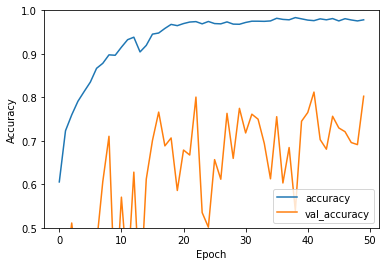

In [32]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

In [33]:
import h5py
model.save("weights.h5")